## Pair Programming Visualización II

Sigamos con más visualizaciones. En este caso trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas V, ese en el que habíamos unido distintos csv en uno.
El objetivo de hoy, mejorar algunas de las gráficas que hicimos en el ejericio de pair programming de ayer y crear algunas nuevas aprovechando que tenemos algunas columnas nuevas en dataframe

In [1]:
import matplotlib.pyplot as plt
import numpy as np # Ya que usaremos algunas de sus funciones ;
import pandas as pd

In [2]:
df = pd.read_csv("../Panda/5.pandas_mergeado.csv", index_col=0)
df.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,2018.06.03.a,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,FATAL,03-Jun-2018


1. Ayer creamos un par de gráficas para USA y España, donde visualizamos el número de ataques en cada país a lo largo de los años y el tipo de los ataques. Hoy tendréis que hacer dos gráficas con subplots:

1.1 En la primera debéis mostrar los tipos ataques en USA y España, cada subplot corresponderá a un país. Debéis:
- Poner nombre a los ejes de cada uno de los subplots
- Poner un títulos a cada uno de los subplots
- Poner el color de las líneas en negro.
- Establecer el tamaño de la gráfica a 15 x 5
- Ponerle marcadores a las gráficas
- No incluir leyenda

In [3]:
df_us = df[(df["country"]=="USA")]
df_us.head(1)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018


In [4]:
df_us_tipo = pd.DataFrame(df_us.groupby('type')['case_number'].count())
df_us_tipo = df_us_tipo.sort_values('case_number')
df_us_tipo.reset_index(inplace = True)
df_us_tipo.head(4)

,type,case_number
0,Sea Disaster,1
1,Boating,11
2,Invalid,48
3,Provoked,49


In [5]:
df_spain = df[(df["country"]=="SPAIN")]
df_spain.head(1)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date
29,2017.08.26.b,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Midday,Shark involvement questionable,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,Lacerations to left foot,26-Aug-2017


In [6]:
df_spain_tipo = pd.DataFrame(df_spain.groupby('type')['case_number'].count())
df_spain_tipo = df_spain_tipo.sort_values('case_number')
df_spain_tipo.reset_index(inplace = True)
df_spain_tipo.head()

,type,case_number
0,Provoked,1
1,Invalid,2
2,Unprovoked,4


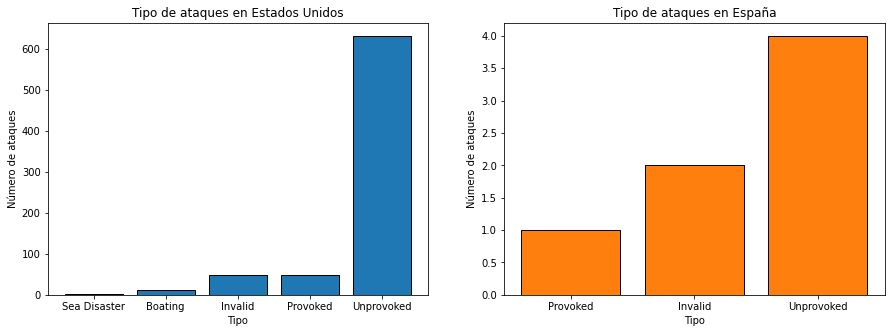

In [7]:
# utilizando los distintos elementos del array "ax" iremos definiendo nuestras gráficas
# establacemos nuestra gráfica que va a estar compuesta por dos figuras
fig,ax = plt.subplots(1,2, figsize=(15,5))

# en el array 0 de nuestro ax querremos la siguiente gráfica
ax[0].bar(df_us_tipo["type"], df_us_tipo["case_number"], color = 'tab:blue', edgecolor= "black")

# en el array 1 de nuestro ax querremos la siguiente gráfica
ax[1].bar(df_spain_tipo["type"], df_spain_tipo["case_number"], color = 'tab:orange', edgecolor= "black")

# para poner los títulos usaremos el método set_title
ax[0].set_title("Tipo de ataques en Estados Unidos")
ax[1].set_title("Tipo de ataques en España")

# cambiamos el nombre de los ejes x e y
ax[0].set_xlabel("Tipo")
ax[0].set_ylabel("Número de ataques")

ax[1].set_xlabel("Tipo")
ax[1].set_ylabel("Número de ataques")

# mostramos lo que nos devuelve esto: 
plt.show()

# El siguiente código permitiría guardar la figura creada con el método .savefig()
# plt.savefig('Visualizacion-II/1.Tipo de ataques Estados Unidos y Tipo de ataques España.png')

1.2 En la segunda debéis mostrar los ataques por año para cada uno de los países.
- De nuevo tendréis que ponerle nombre a los ejes y título a cada gráfica.
- En este caso el subplot deberá tener dos filas y una columna
- No incluir leyenda
- Cambiar el color de las barras

In [8]:
df_spain_año = pd.DataFrame(df_spain.groupby('year')['case_number'].count())
df_spain_año = df_spain_año.sort_values('year')
df_spain_año.reset_index(inplace = True)
df_spain_año.head()

,year,case_number
0,0.0,1
1,1764.0,1
2,1993.0,1
3,2010.0,1
4,2015.0,1


In [9]:
df_us_año = pd.DataFrame(df_us.groupby('year')['case_number'].count())
df_us_año = df_us_año.sort_values('year')
df_us_año.reset_index(inplace = True)
df_us_año.tail()

,year,case_number
71,2014.0,20
72,2015.0,39
73,2016.0,18
74,2017.0,16
75,2018.0,3


Lo podemos hacer así:

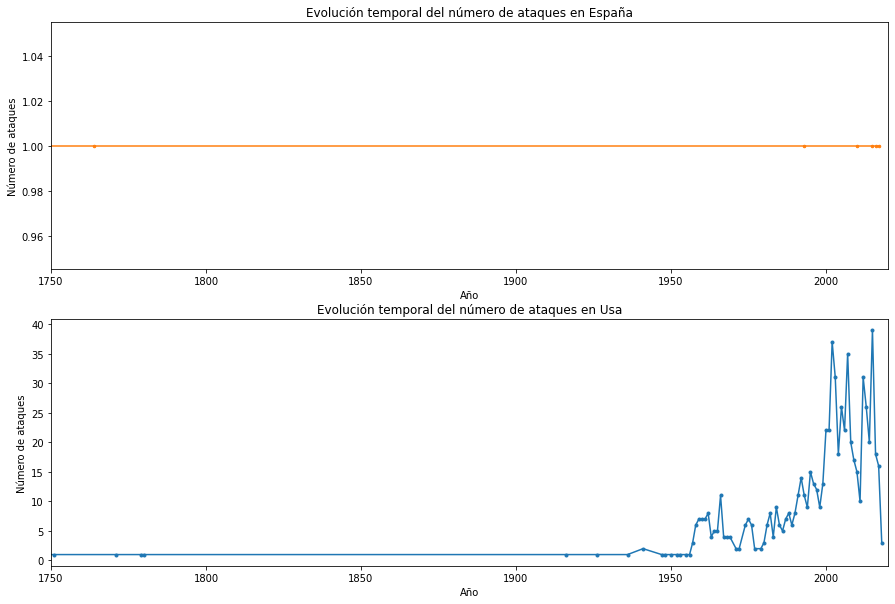

In [19]:
fig,ax = plt.subplots(2,1, figsize = (15,10))

ax[0].plot(df_spain_año["year"], df_spain_año["case_number"], color='tab:orange', label = 'Spain', marker=".", markersize = 5 )

ax[1].plot(df_us_año["year"], df_us_año["case_number"], color = 'tab:blue', marker=".")

# en este caso vamos a ampliar los límites de los ejes

ax[0].set_xlim(1750,2020)
ax[1].set_xlim(1750,2020)

# para poner los títulos usaremos el método set_title
ax[0].set_title("Evolución temporal del número de ataques en España")
ax[1].set_title("Evolución temporal del número de ataques en Usa")

# cambiamos el nombre de los ejes x e y

ax[0].set_xlabel("Año")
ax[0].set_ylabel("Número de ataques")

ax[1].set_xlabel("Año")
ax[1].set_ylabel("Número de ataques")


# mostramos lo que nos devuelve esto: 
plt.show()


o con columnas:

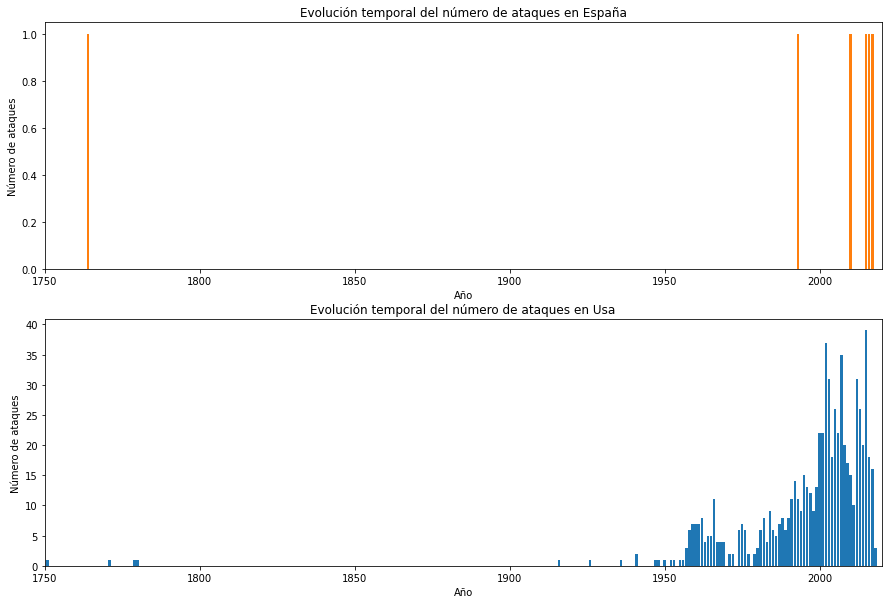

In [10]:
fig,ax = plt.subplots(2,1, figsize = (15,10))

ax[0].bar(df_spain_año["year"], df_spain_año["case_number"], color='tab:orange', label = 'USA')

ax[1].bar(df_us_año["year"], df_us_año["case_number"], color = 'tab:blue')

# en este caso vamos a ampliar los límites de los ejes

ax[0].set_xlim(1750,2020)
ax[1].set_xlim(1750,2020)

# para poner los títulos usaremos el método set_title
ax[0].set_title("Evolución temporal del número de ataques en España")
ax[1].set_title("Evolución temporal del número de ataques en Usa")

# cambiamos el nombre de los ejes x e y

ax[0].set_xlabel("Año")
ax[0].set_ylabel("Número de ataques")

ax[1].set_xlabel("Año")
ax[1].set_ylabel("Número de ataques")


# mostramos lo que nos devuelve esto: 
plt.show()

# El siguiente código guarda la imagen a través del método .savefig()
#plt.savefig('Visualizacion-II/2.Evolución temporal del número de ataques en España y en Estados Unidos.jpg')

2. Cread un único gráfico donde juntéis las gráficas de los tipos de ataques en una sola. Debéis:

- Poner leyenda a la gráfica
- Cada línea debe ir en un color
- Ponerle nombre a los ejes y a la gráfica.
- Poner marcadores a las lineas.

In [11]:
x_us= df_us["type"].unique()
y_us= df_us["type"].value_counts()
print(x_us)
print("----------")
print(y_us)

['Boating' 'Unprovoked' 'Invalid' 'Provoked' 'Sea Disaster']
----------
Unprovoked      632
Provoked         49
Invalid          48
Boating          11
Sea Disaster      1
Name: type, dtype: int64


In [12]:
x_es = df_spain["type"].unique()
print(x_es)
print("-----------")
y_es = df_spain["type"].value_counts()
print(y_es)

['Invalid' 'Unprovoked' 'Provoked']
-----------
Unprovoked    4
Invalid       2
Provoked      1
Name: type, dtype: int64


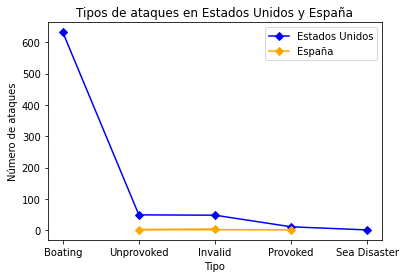

In [13]:
plt.figure()

plt.plot (x_us , y_us, marker="D", c="blue")
plt.plot (x_es , y_es, marker="D", c="orange")


# para poner el título usaremos el método set_title
plt.title("Tipos de ataques en Estados Unidos y España")

# cambiamos el nombre de los ejes x e y
plt.xlabel("Tipo")
plt.ylabel("Número de ataques")


#Ponemos la leyenda
plt.legend(labels=['Estados Unidos','España'])

# mostramos lo que nos devuelve esto: 
plt.show()

# El siguiente código guardaría la imagen
# plt.savefig('Visualizacion-II/3.Gráfica comparativa líneas del Tipo de ataques en Estados Unidos y España.png')

3. Guardad las figuras creadas en cada caso. Podéis usar el formato que queráis. Guarda todas las fotos en una carpeta llamada Visualizacion-II.

Se ha guardado las imágenes de manera manual, se indica al final de cada imagen el código para guardar aplicando el método plt.savefig()